# Proteotyping of pure bacterial cultures
Pure cultures of four species of bacteria: *Escherichia coli*, *Pseudomonas aeruginosa*, *Staphyoloccus aureus*, *Streptococcus pneumoniae*. Each species was cultured in three identical replicates and run through the following workflow steps:

 1. Cell culture
 2. Proteomics prep
 3. Tandem MS
 4. ReAdW raw to mzXML conversion
 5. X!Tandem peptide search
 6. BLAT alignments of peptides to translated genome sequences
 7. TCUP

The following samples were used:

    QE_150508_32	 	S. pneumoniae
    QE_150508_35	 	S. pneumoniae
    QE_150508_38	 	S. pneumoniae
    QE_150611_128		S. aureus
    QE_150611_131		S. aureus
    QE_150611_137		S. aureus
    QE_150611_140		E. coli
    QE_150611_143		E. coli
    QE_150611_146		E. coli
    QE_150611_152		P. aeruginosa
    QE_150611_155		P. aeruginosa
    QE_150611_158		P. aeruginosa
    QE_150611_161		P. aeruginosa, E. coli, S. aureus, S. pneumoniae, 1:1:1:1 mixture
    QE_150611_164		P. aeruginosa, E. coli, S. aureus, S. pneumoniae, 1:1:1:1 mixture
    QE_150611_169		P. aeruginosa, E. coli, S. aureus, S. pneumoniae, 1:1:1:1 mixture

In [26]:
# Import all required libraries
import matplotlib as mpl, matplotlib
matplotlib.use("Agg")
%matplotlib inline
from pylab import *
import numpy as np
import pandas as pd
from scipy.stats import sem
from os import listdir, path

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

C:\Users\Fredrik\Anaconda3\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Pure bacterial cultures
Data from the analysis of bacterial cultures were manually entered into the next cell of the notebook.
The data are from the following runs:

    QE_150508_{32,35,38}     S. pneumoniae
    QE_150611_{128,131,137}  S. aureus
    QE_150611_{140,143,146}  E. coli
    QE_150611_{152,155,157}  P. aeruginosa

In [27]:
species = pd.Series(["E. coli", "E. coli", "E. coli", 
                     "P. aeruginosa", "P. aeruginosa", "P. aeruginosa", 
                     "S. aureus", "S. aureus", "S. aureus", 
                     "S. pneumoniae", "S. pneumoniae", "S. pneumoniae"],
                   name="Species")
numspectra = pd.Series([2238, 3367, 3372,
                        2995, 1698, 3580,
                        3774, 3705, 3190, 
                        5333, 5193, 4754], 
                       name="Number of spectra")
discriminative_peptides = pd.Series([284, 383, 422,
                                     1435, 823, 1698,
                                     685, 543, 725,
                                     466, 434, 356], 
                                     name="Discriminative peptides")
correct_assignments = pd.Series([262, 348, 379,
                                 1417, 813, 1674, 
                                 661, 527, 707,
                                 437, 398, 326], 
                                name="Correct assignments")
TPR = pd.Series(correct_assignments / discriminative_peptides, name="True positive rate (TPR)")
raw_data = pd.DataFrame([species, numspectra, discriminative_peptides, correct_assignments, TPR]).transpose()
print(raw_data)

          Species Number of spectra Discriminative peptides Correct assignments True positive rate (TPR)
0         E. coli              2238                     284                 262                 0.922535
1         E. coli              3367                     383                 348                 0.908616
2         E. coli              3372                     422                 379                 0.898104
3   P. aeruginosa              2995                    1435                1417                 0.987456
4   P. aeruginosa              1698                     823                 813                 0.987849
5   P. aeruginosa              3580                    1698                1674                 0.985866
6       S. aureus              3774                     685                 661                 0.964964
7       S. aureus              3705                     543                 527                 0.970534
8       S. aureus              3190                    

In [28]:
print("Means")
print(raw_data.groupby("Species").aggregate(lambda x: np.mean(x)))
print("Standard deviations")
print(raw_data.groupby("Species").aggregate(lambda x: np.std(x)))
print("Overall maximum:", np.max(raw_data["Number of spectra"]))
print("Overall minimum:", np.min(raw_data["Number of spectra"]))

Means
               Number of spectra  Discriminative peptides  Correct assignments  True positive rate (TPR)
Species                                                                                                 
E. coli              2992.333333               363.000000           329.666667                  0.909752
P. aeruginosa        2757.666667              1318.666667          1301.333333                  0.987057
S. aureus            3556.333333               651.000000           631.666667                  0.970223
S. pneumoniae        5093.333333               418.666667           387.000000                  0.923516
Standard deviations
               Number of spectra  Discriminative peptides  Correct assignments  True positive rate (TPR)
Species                                                                                                 
E. coli               533.398121                58.086143            49.492985                  0.010006
P. aeruginosa         786.437

## Pure bacterial samples barchart
Plot a barchart of the average sensitivity for each species, along with standard error bars (SEM) to indicate the variability of the results.

In [29]:
means_sems = raw_data.groupby("Species")["True positive rate (TPR)"].aggregate([lambda x: np.mean(x), sem])
print(means_sems)
names = means_sems.index
means = means_sems["<lambda>"]
sems = means_sems["sem"]

               <lambda>       sem
Species                          
E. coli        0.909752  0.007075
P. aeruginosa  0.987057  0.000606
S. aureus      0.970223  0.002951
S. pneumoniae  0.923516  0.007136


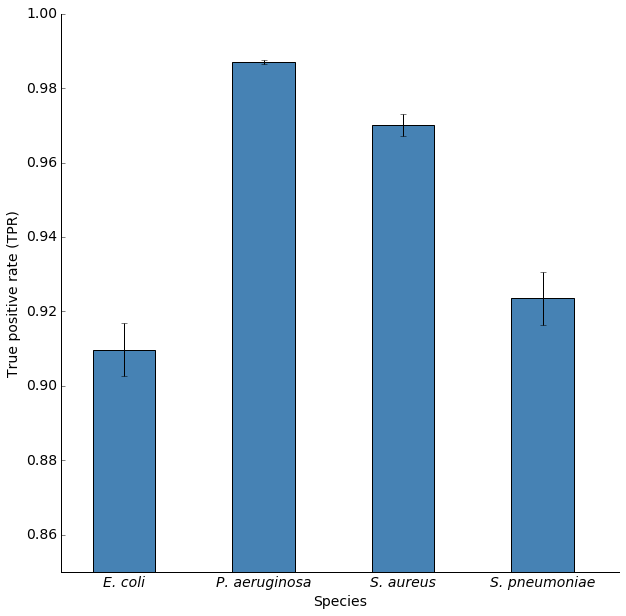

In [30]:
font = {"family": "sans",
        "weight": "normal",
        "size": 14}
mpl.rc("font", **font)

indices = np.arange(0, len(means_sems))
width = 0.45

fig, ax = plt.subplots()
rects = ax.bar(indices, means, width, yerr=sems, color="steelblue", error_kw=dict(ecolor="black"))
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("left")

# Adjust plot area, set tick labels
ylim([0.85, 1])
xlim([-width/2, len(names)-width/2])
xlabel("Species")
ylabel("True positive rate (TPR)")
ax.set_xticks(indices + width/2)
ax.set_xticklabels(names, style="italic")

# Adjust figure size, save figures
fig.set_figheight(10)
fig.set_figwidth(10)
plt.savefig("real_cultures_tpr.png")
plt.savefig("real_cultures_tpr.pdf")

# Mixed bacterial cultures
Mixed samples with equal ratio of all four species (1:1:1:1), the data are from the following runs:

    QE_150611_161
    QE_150611_164
    QE_150611_169

In [31]:
# Raw data for mixed samples
species = pd.Series(["E. coli", "E. coli", "E. coli", 
                     "P. aeruginosa", "P. aeruginosa", "P. aeruginosa", 
                     "S. aureus", "S. aureus", "S. aureus", 
                     "S. pneumoniae", "S. pneumoniae", "S. pneumoniae"],
                   name="Species")
numspectra_mix = pd.Series([2753, 3418, 3145,
                        2753, 3418, 3145,
                        2753, 3418, 3145,
                        2753, 3418, 3145],
                       name="Number of spectra")
discriminative_fragments = pd.Series([592, 736, 683,
                                      592, 736, 683,
                                      592, 736, 683,
                                      592, 736, 683],
                                     name="Discriminative fragments")
species_assignments = pd.Series([61,  72,  63,
                                 344, 403, 378, 
                                 101, 150, 139,
                                 67,  84,  82], 
                                name="Species assignments")
estimated_abundance = pd.Series(species_assignments / discriminative_fragments, name="Estimated abundance")
mix_data = pd.DataFrame([species, numspectra_mix, discriminative_fragments, species_assignments, estimated_abundance]).transpose()
print(mix_data)

          Species Number of spectra Discriminative fragments Species assignments Estimated abundance
0         E. coli              2753                      592                  61            0.103041
1         E. coli              3418                      736                  72           0.0978261
2         E. coli              3145                      683                  63           0.0922401
3   P. aeruginosa              2753                      592                 344            0.581081
4   P. aeruginosa              3418                      736                 403            0.547554
5   P. aeruginosa              3145                      683                 378            0.553441
6       S. aureus              2753                      592                 101            0.170608
7       S. aureus              3418                      736                 150            0.203804
8       S. aureus              3145                      683                 139           

In [32]:
print("Means")
print(mix_data.groupby("Species").aggregate(lambda x: np.mean(x)))
print("Standard deviations")
print(mix_data.groupby("Species").aggregate(lambda x: np.std(x)))
print("Overall average spectra:", np.mean(mix_data["Number of spectra"]))
print("Overall average discriminative:", np.mean(mix_data["Discriminative fragments"]))
print("Overall maximum:", np.max(mix_data["Number of spectra"]) )
print("Overall minimum:", np.min(mix_data["Number of spectra"]))

Means
               Number of spectra  Discriminative fragments  Species assignments  Estimated abundance
Species                                                                                             
E. coli              3105.333333                670.333333            65.333333             0.097702
P. aeruginosa        3105.333333                670.333333           375.000000             0.560692
S. aureus            3105.333333                670.333333           130.000000             0.192642
S. pneumoniae        3105.333333                670.333333            77.666667             0.115788
Standard deviations
               Number of spectra  Discriminative fragments  Species assignments  Estimated abundance
Species                                                                                             
E. coli               272.930191                 59.466143             4.784233             0.004410
P. aeruginosa         272.930191                 59.466143       

## Adjustment/normalization ratios
The adjustment ratio used to modify the raw estimations of abundance are calculated from the TPR data of the pure bacterial cultures.  

In [33]:
# Compute adjustment ratios based on data from pure samples
adjustment_ratios = {}
for name, group in raw_data.groupby("Species"):
    adjustment_ratios[name] = np.mean(group["Correct assignments"] / group["Number of spectra"])

# Add a column with corrected values for estimated abundance
adjusted_abundance = pd.Series(index=mix_data.index)
for row in mix_data.iterrows():
    adjusted_abundance[row[0]] = row[1]["Estimated abundance"] / adjustment_ratios[row[1]["Species"]]
mix_data.loc[:,'Corrected abundance'] = adjusted_abundance

print("Normalization factors:")
for species, ratio in adjustment_ratios.items():
    print("{:<15} {}".format(species, ratio))
print("Data table")

print(mix_data)

Normalization factors:
S. aureus       0.179672014645859
P. aeruginosa   0.4731727405728461
E. coli         0.11094037294270091
S. pneumoniae   0.07571936231444919
Data table
          Species Number of spectra Discriminative fragments Species assignments Estimated abundance  Corrected abundance
0         E. coli              2753                      592                  61            0.103041             0.928792
1         E. coli              3418                      736                  72           0.0978261             0.881790
2         E. coli              3145                      683                  63           0.0922401             0.831439
3   P. aeruginosa              2753                      592                 344            0.581081             1.228053
4   P. aeruginosa              3418                      736                 403            0.547554             1.157198
5   P. aeruginosa              3145                      683                 378            0

## Plot mixture and adjusted mixture results
The per species results from the mixed samples are plotted in a bar plot with standard error bars. The adjusted values are plotted alongside the raw per species TPR from the mixed samples to illustrate how adjusting the values improve the results. 

In [34]:
# Reduce estimated abundances for the mixed samples for use in bar plot
mix_means_sems = mix_data.groupby("Species")["Estimated abundance"].aggregate([lambda x: np.mean(x), sem])
print("Mixed samples without correction")
print(mix_means_sems)
mix_names = mix_means_sems.index
mix_means = mix_means_sems["<lambda>"]
mix_sems = mix_means_sems["sem"]

# Reduce corrected abundance estimates for use in bar plot
mix_means_sems_corrected = mix_data.groupby("Species")["Corrected abundance"].aggregate([lambda x: np.mean(x), sem])
print("Mixed samples with correction")
print(mix_means_sems_corrected)
mix_means_corrected = mix_means_sems_corrected["<lambda>"]
mix_sems_corrected = mix_means_sems_corrected["sem"]

# Normalize the corrected abundance estimates for the mixed samples
mix_means_corrected_normalized = mix_means_corrected / sum(mix_means_corrected)
mix_sems_corrected_normalized = mix_sems_corrected / sum(mix_means_corrected) 
print("\nNormalized mixed samples with correction")
print("{:<14} {:>8} {:>8}".format("Species", "Abundance", "SEM"))
for species, v1, v2 in zip(mix_names, mix_means_corrected_normalized, mix_sems_corrected_normalized):
    print("{:<14} {:<1.6f}  {:<1.6f}".format(species, v1, v2))

Mixed samples without correction
               <lambda>       sem
Species                          
E. coli        0.097702  0.003118
P. aeruginosa  0.560692  0.010335
S. aureus      0.192642  0.011017
S. pneumoniae  0.115788  0.002153
Mixed samples with correction
               <lambda>       sem
Species                          
E. coli        0.880674  0.028109
P. aeruginosa  1.184963  0.021842
S. aureus      1.072188  0.061319
S. pneumoniae  1.529176  0.028432

Normalized mixed samples with correction
Species        Abundance      SEM
E. coli        0.188702  0.006023
P. aeruginosa  0.253902  0.004680
S. aureus      0.229738  0.013139
S. pneumoniae  0.327657  0.006092


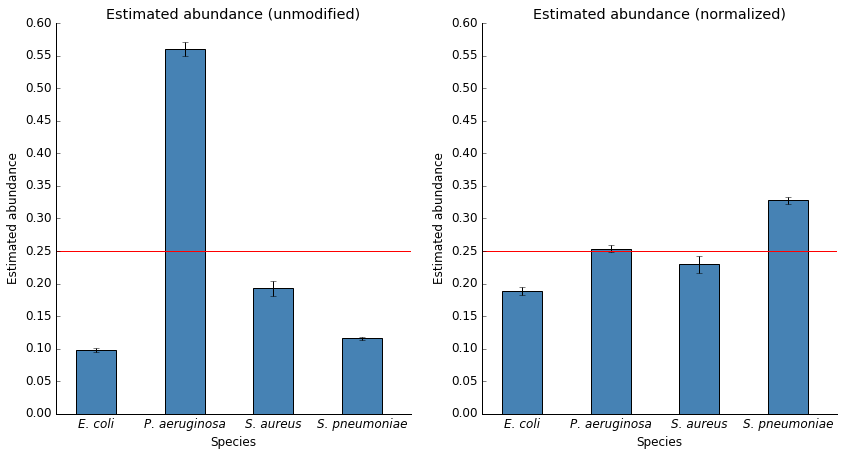

In [35]:
# Adjust bar plot settings
font = {"family": "sans",
        "weight": "normal",
        "size": 12}
mpl.rc("font", **font)
indices = np.arange(0, len(mix_names))
width = 0.45

# Create plot figure with two subplots axes
fig_mix, (ax_mix1, ax_mix2) = plt.subplots(1, 2) #, sharey=True)

# First plot with raw unmodified abundance estimations
rects_mix1 = ax_mix1.bar(indices, 
                         mix_means, 
                         width, 
                         color="steelblue", 
                         yerr=mix_sems, 
                         error_kw=dict(ecolor="black"))
ax_mix1.spines["top"].set_color("none")
ax_mix1.spines["right"].set_color("none")
ax_mix1.xaxis.set_ticks_position("none")
ax_mix1.yaxis.set_ticks_position("left")
# Adjust plot area, set tick labels
ax_mix1.set_xlim([-width/2, len(mix_names)-width/2])
ax_mix1.set_ylim([0, 0.6])
ax_mix1.set_xlabel("Species")
ax_mix1.set_ylabel("Estimated abundance")
ax_mix1.set_title("Estimated abundance (unmodified)")
ax_mix1.set_xticks(indices + width/2)
ax_mix1.set_xticklabels(mix_names, style="italic")
ax_mix1.set_yticks(np.arange(0, 0.61, 0.05))
# Place expected ratio line
ax_mix1.plot([-.5,4], [0.25,0.25], color="r")

# Second plot with corrected and normalized estimated abundances
rects_mix2 = ax_mix2.bar(indices, 
                         mix_means_corrected_normalized, 
                         width, 
                         color="steelblue", 
                         yerr=mix_sems_corrected_normalized,  
                         error_kw=dict(ecolor="black"))
ax_mix2.spines["top"].set_color("none")
ax_mix2.spines["right"].set_color("none")
ax_mix2.xaxis.set_ticks_position("none")
ax_mix2.yaxis.set_ticks_position("left")
# Adjust plot area, set tick labels
ax_mix2.set_xlim([-width/2, len(mix_names)-width/2])
ax_mix2.set_ylim([0, 0.6])
ax_mix2.set_xlabel("Species")
ax_mix2.set_ylabel("Estimated abundance")
ax_mix2.set_title("Estimated abundance (normalized)")
ax_mix2.set_xticks(indices + width/2)
ax_mix2.set_xticklabels(mix_names, style="italic")
ax_mix2.set_yticks(np.arange(0, 0.61, 0.05))
# Place expected ratio line
ax_mix2.plot([-.5,4], [0.25,0.25], color="r")

# Adjust figure size, save figures
fig_mix.set_figheight(7)
fig_mix.set_figwidth(14)
plt.savefig("real_cultures_mix_tpr.png")
plt.savefig("real_cultures_mix_tpr.pdf")

# Supplementary figure normalized with in-silico results
Instead of normalizing with results from pure cultures, normalization factors can be determined from in silico results.

In [36]:
# Add a column with in-silico-corrected values for estimated abundance
insilico_abundance = pd.Series(index=mix_data.index)
insilico_adjustment_ratios = {"E. coli": 0.2704, 
                              "P. aeruginosa": 0.5571, 
                              "S. aureus":  0.5227, 
                              "S. pneumoniae": 0.1788}
for row in mix_data.iterrows():
    insilico_abundance[row[0]] = row[1]["Estimated abundance"] / insilico_adjustment_ratios[row[1]["Species"]]
mix_data.loc[:,'Insilico corrected abundance'] = insilico_abundance


# Reduce corrected abundance estimates for use in bar plot
mix_means_sems_corrected_insilico = mix_data.groupby("Species")["Insilico corrected abundance"].aggregate([lambda x: np.mean(x), sem])
print("Mixed samples with correction")
print(mix_means_sems_corrected_insilico)
mix_means_corrected_insilico = mix_means_sems_corrected_insilico["<lambda>"]
mix_sems_corrected_insilico = mix_means_sems_corrected_insilico["sem"]

# Normalize the corrected abundance estimates for the mixed samples
mix_means_corrected_normalized_insilico = mix_means_corrected_insilico / sum(mix_means_corrected_insilico)
mix_sems_corrected_normalized_insilico = mix_sems_corrected_insilico / sum(mix_means_corrected_insilico) 
print("\nNormalized mixed samples with in silico correction")
print("{:<14} {:>8} {:>8}".format("Species", "Abundance", "SEM"))
for species, v1, v2 in zip(mix_names, mix_means_corrected_normalized_insilico, mix_sems_corrected_normalized_insilico):
    print("{:<14} {:<1.6f}  {:<1.6f}".format(species, v1, v2))

Mixed samples with correction
               <lambda>       sem
Species                          
E. coli        0.361325  0.011533
P. aeruginosa  1.006448  0.018552
S. aureus      0.368552  0.021078
S. pneumoniae  0.647585  0.012041

Normalized mixed samples with in silico correction
Species        Abundance      SEM
E. coli        0.151568  0.004838
P. aeruginosa  0.422184  0.007782
S. aureus      0.154600  0.008842
S. pneumoniae  0.271648  0.005051


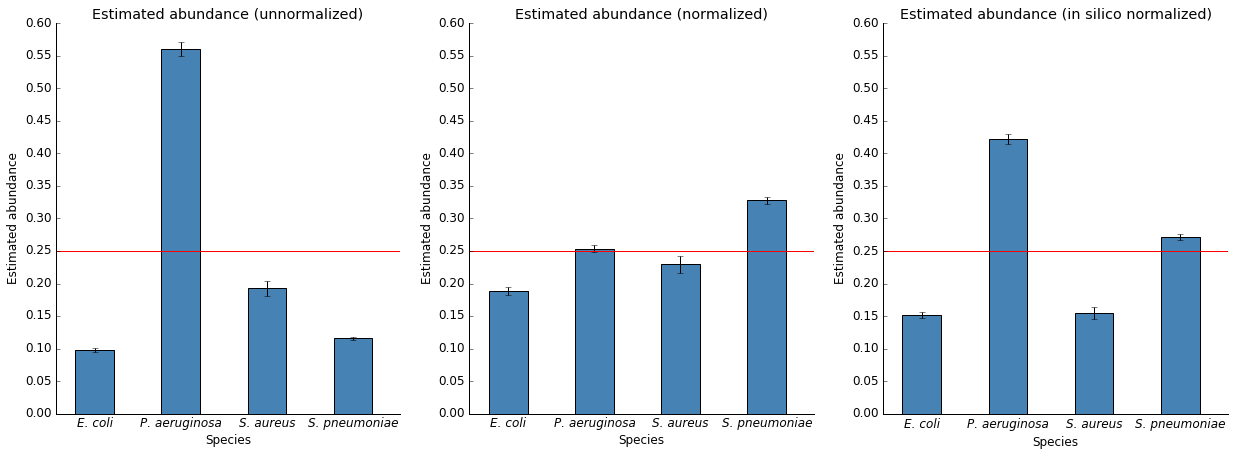

In [37]:
# Adjust bar plot settings
font = {"family": "sans",
        "weight": "normal",
        "size": 12}
mpl.rc("font", **font)
indices = np.arange(0, len(mix_names))
width = 0.45

# Create plot figure with three  subplots axes
fig_mix, (ax_mix1, ax_mix2, ax_mix3) = plt.subplots(1, 3) #, sharey=True)

# First plot with raw unmodified abundance estimations
rects_mix1 = ax_mix1.bar(indices, 
                         mix_means, 
                         width, 
                         color="steelblue", 
                         yerr=mix_sems, 
                         error_kw=dict(ecolor="black"))
ax_mix1.spines["top"].set_color("none")
ax_mix1.spines["right"].set_color("none")
ax_mix1.xaxis.set_ticks_position("none")
ax_mix1.yaxis.set_ticks_position("left")
# Adjust plot area, set tick labels
ax_mix1.set_xlim([-width/2, len(mix_names)-width/2])
ax_mix1.set_ylim([0, 0.6])
ax_mix1.set_xlabel("Species")
ax_mix1.set_ylabel("Estimated abundance")
ax_mix1.set_title("Estimated abundance (unnormalized)")
ax_mix1.set_xticks(indices + width/2)
ax_mix1.set_xticklabels(mix_names, style="italic")
ax_mix1.set_yticks(np.arange(0, 0.61, 0.05))
# Place expected ratio line
ax_mix1.plot([-.5,4], [0.25,0.25], color="r")

# Second plot with corrected and normalized estimated abundances
rects_mix2 = ax_mix2.bar(indices, 
                         mix_means_corrected_normalized, 
                         width, 
                         color="steelblue", 
                         yerr=mix_sems_corrected_normalized,  
                         error_kw=dict(ecolor="black"))
ax_mix2.spines["top"].set_color("none")
ax_mix2.spines["right"].set_color("none")
ax_mix2.xaxis.set_ticks_position("none")
ax_mix2.yaxis.set_ticks_position("left")
# Adjust plot area, set tick labels
ax_mix2.set_xlim([-width/2, len(mix_names)-width/2])
ax_mix2.set_ylim([0, 0.6])
ax_mix2.set_xlabel("Species")
ax_mix2.set_ylabel("Estimated abundance")
ax_mix2.set_title("Estimated abundance (normalized)")
ax_mix2.set_xticks(indices + width/2)
ax_mix2.set_xticklabels(mix_names, style="italic")
ax_mix2.set_yticks(np.arange(0, 0.61, 0.05))
# Place expected ratio line
ax_mix2.plot([-.5,4], [0.25,0.25], color="r")

# Third plot with in silico corrected and normalized estimated abundances
rects_mix3 = ax_mix3.bar(indices, 
                         mix_means_corrected_normalized_insilico, 
                         width, 
                         color="steelblue", 
                         yerr=mix_sems_corrected_normalized_insilico,  
                         error_kw=dict(ecolor="black"))
ax_mix3.spines["top"].set_color("none")
ax_mix3.spines["right"].set_color("none")
ax_mix3.xaxis.set_ticks_position("none")
ax_mix3.yaxis.set_ticks_position("left")
# Adjust plot area, set tick labels
ax_mix3.set_xlim([-width/2, len(mix_names)-width/2])
ax_mix3.set_ylim([0, 0.6])
ax_mix3.set_xlabel("Species")
ax_mix3.set_ylabel("Estimated abundance")
ax_mix3.set_title("Estimated abundance (in silico normalized)")
ax_mix3.set_xticks(indices + width/2)
ax_mix3.set_xticklabels(mix_names, style="italic")
ax_mix3.set_yticks(np.arange(0, 0.61, 0.05))
# Place expected ratio line
ax_mix3.plot([-.5,4], [0.25,0.25], color="r")

# Adjust figure size, save figures
fig_mix.set_figheight(7)
fig_mix.set_figwidth(21)
plt.savefig("real_cultures_mix_tpr_insilico.png")
plt.savefig("real_cultures_mix_tpr_insilico.pdf")

In [38]:
# Print a table of all the relevant abundances, raw, and normalized, and in silico corrected and normalized
print(mix_data[["Species", "Estimated abundance", "Corrected abundance", "Insilico corrected abundance"]])

          Species Estimated abundance  Corrected abundance  Insilico corrected abundance
0         E. coli            0.103041             0.928792                      0.381067
1         E. coli           0.0978261             0.881790                      0.361783
2         E. coli           0.0922401             0.831439                      0.341125
3   P. aeruginosa            0.581081             1.228053                      1.043046
4   P. aeruginosa            0.547554             1.157198                      0.982865
5   P. aeruginosa            0.553441             1.169638                      0.993432
6       S. aureus            0.170608             0.949553                      0.326398
7       S. aureus            0.203804             1.134313                      0.389907
8       S. aureus            0.203514             1.132697                      0.389351
9   S. pneumoniae            0.113176             1.494673                      0.632974
10  S. pneumoniae    